In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


# TVga nisbatan solishtirma

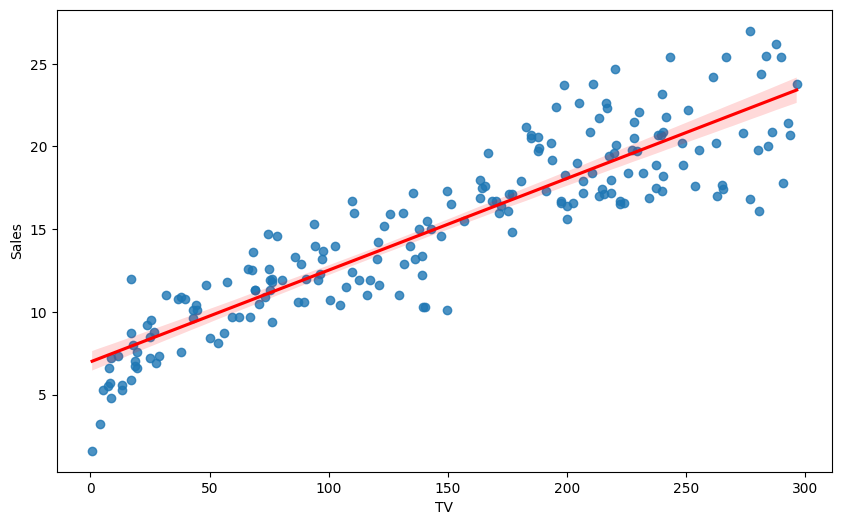

In [6]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='TV', y='Sales', line_kws={"color": "red"})
plt.show()

# Radioga nisbatan solishtirma

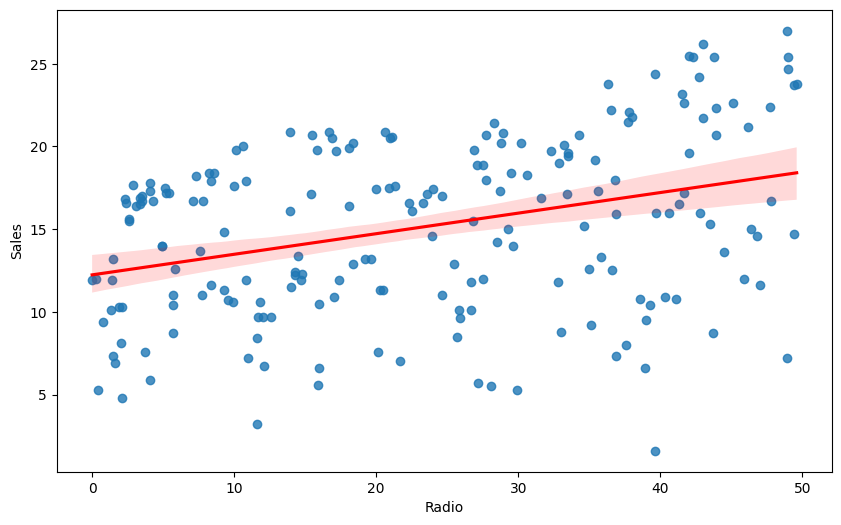

In [7]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Radio', y='Sales', line_kws={"color": "red"})
plt.show()

# Gazetaga nisbatan solishtirma

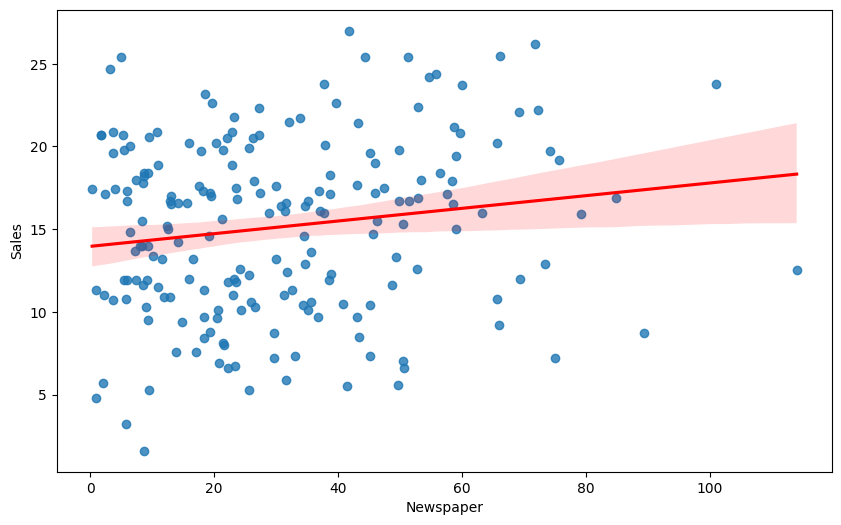

In [8]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Newspaper', y='Sales', line_kws={"color": "red"})
plt.show()

# Getting ready model

In [9]:
X = df['TV'].to_numpy()
y = df['Sales'].to_numpy()

In [10]:
df.shape

(200, 4)

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.10, random_state=42)

# Linear Regression ML

In [12]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

LR_model.fit(x_train, y_train)

theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=0.05513263076693964
theta0=7.044916461655207


Text(0, 0.5, 'Sales')

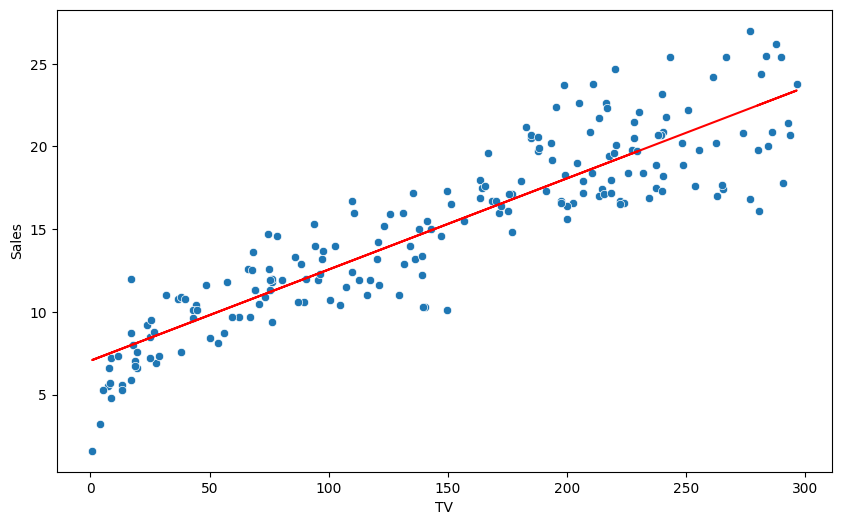

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("TV")
plt.ylabel("Sales")

# Grading the model

In [15]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

In [17]:
y_predict = LR_model.predict(x_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=2.037955356968121
RMSE=2.5103822386472214
